# **Prepare and Load Data**

## Identifying Data Types

In this section, we classify each feature in the dataset
based on its data type and analytical characteristics,
such as nominal, ordinal, continuous, or discrete.


In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# load the data

df = pd.read_excel('titanic.xlsx')
df.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [3]:
# information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1349 non-null   int64  
 1   survived   1349 non-null   int64  
 2   name       1349 non-null   object 
 3   sex        1349 non-null   object 
 4   age        1076 non-null   float64
 5   sibsp      1349 non-null   int64  
 6   parch      1349 non-null   int64  
 7   ticket     1349 non-null   object 
 8   fare       1348 non-null   float64
 9   cabin      296 non-null    object 
 10  embarked   1347 non-null   object 
 11  boat       487 non-null    object 
 12  body       129 non-null    float64
 13  home.dest  748 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 147.7+ KB


- pclass = ordinal
- survived = Nominal
- name = Nomonal
- sex = Nominal
- age = Kontinu
- Sibs = Diskrit
- Parch = diskrit
- ticket = nominal
- fare = kontinu
- cabin = nominal
- embarked = nominal
- boat = nominal
- body = diskrit
- home.dest = nominal

In [4]:
# change column "age" data type
df['age'] = df['age'].round().astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1349 non-null   int64  
 1   survived   1349 non-null   int64  
 2   name       1349 non-null   object 
 3   sex        1349 non-null   object 
 4   age        1076 non-null   Int64  
 5   sibsp      1349 non-null   int64  
 6   parch      1349 non-null   int64  
 7   ticket     1349 non-null   object 
 8   fare       1348 non-null   float64
 9   cabin      296 non-null    object 
 10  embarked   1347 non-null   object 
 11  boat       487 non-null    object 
 12  body       129 non-null    float64
 13  home.dest  748 non-null    object 
dtypes: Int64(1), float64(2), int64(4), object(7)
memory usage: 149.0+ KB


In [5]:
# cek missing value 
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           273
sibsp           0
parch           0
ticket          0
fare            1
cabin        1053
embarked        2
boat          862
body         1220
home.dest     601
dtype: int64

In [6]:
# handle missing value

# handle missing value in 'age' column
df['age'].fillna(df['age'].median(), inplace=True)

# handle missing value in 'cabin' column
df['cabin'].fillna(df['cabin'].mode()[0], inplace=True)

# handle missing value in 'boat' column
df['boat'].fillna(df['boat'].mode()[0], inplace=True)

# handle missing value in 'body' column
df['body'].fillna(df['body'].mode()[0], inplace=True)

# handle missing value in 'home.dest' column
df['home.dest'].fillna(df['home.dest'].mode()[0], inplace=True)

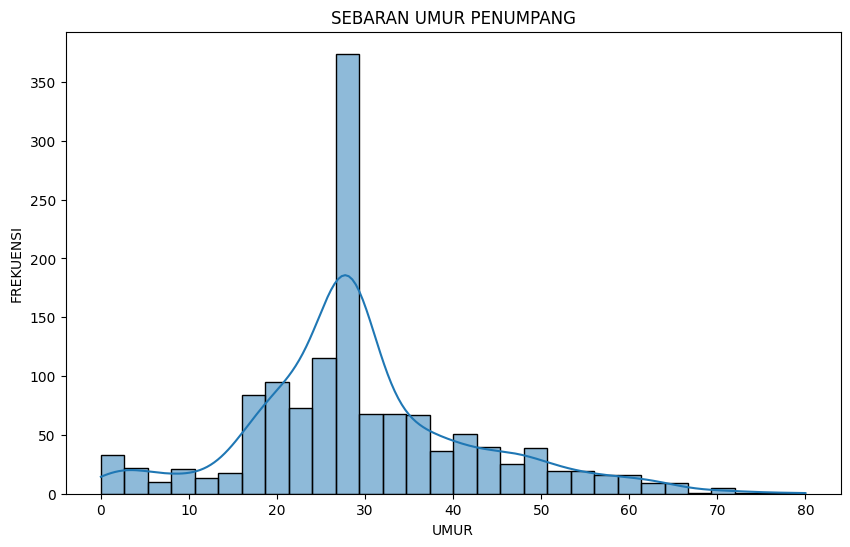

In [7]:
# create histogram to see age distribution

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='age', bins=30, kde=True)
plt.title('SEBARAN UMUR PENUMPANG')
plt.xlabel('UMUR')
plt.ylabel('FREKUENSI')
plt.show()

**Age Distribution**

The distribution of passenger age is positively skewed (right-skewed).
Most passengers fall within the young to middle-aged adult range,
with a peak around the 20–30 age group.

The number of passengers decreases as age increases,
resulting in a long tail on the right side of the distribution.
This pattern reflects the relatively smaller proportion
of elderly passengers on board.


In [8]:
# count of survived passengers by using filter
survived_counts = df[df['survived'] == 1]
not_survived_counts = df[df['survived'] == 0]

print(f'count of survived passengers is {survived_counts["survived"].count()}')
print(f'count of not survived passengers is {not_survived_counts["survived"].count()}')

count of survived passengers is 502
count of not survived passengers is 847


In [9]:
# mean of survived passengers age
print(f'Mean of survived passengers age is {survived_counts["age"].mean()}')
print(f'Mean of not survived passengers age is {not_survived_counts["age"].mean()}')

Mean of survived passengers age is 29.00597609561753
Mean of not survived passengers age is 29.82880755608028


In [10]:
# Find numerical and categorical columns

numerical = df.select_dtypes(include=['int64','float64']).columns
categorical = df.select_dtypes(include=['object']).columns

print("List of numerical columns:", list(numerical))
print("List of categorical columns:", list(categorical))

List of numerical columns: ['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'body']
List of categorical columns: ['name', 'sex', 'ticket', 'cabin', 'embarked', 'boat', 'home.dest']


## Exploring Categorical Features

In this section, categorical features in the dataset are explored
to understand their characteristics and analytical roles.

Each categorical variable is classified as either **ordinal**
or **nominal** based on whether the categories have a natural order.
This classification is important for selecting appropriate
encoding and analysis techniques in later stages.


**categorical ordinal**
Ordinal categorical data type is a categorical data type in which each value has a level or hierarchy. 
Example:  Class 1 > Class 2 > Class 3

**Categorical nominal**
Nominal categorical data type is the simplest type of categorical data used only to distinguish or label categories without any levels.
Examples: gender, religion, color, etc.

In [11]:
categorical_type = {
    "Pclass": "Ordinal",
    "Sex": "Nominal",
    "Embarked": "Nominal",
    "Survived": "Nominal (Binary)"
}

categorical_type

{'Pclass': 'Ordinal',
 'Sex': 'Nominal',
 'Embarked': 'Nominal',
 'Survived': 'Nominal (Binary)'}

## Efficient Data Exploration with Loops


In [12]:
for col in categorical:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())



Column: name
name
Zakarian, Mr. Mapriededer                                                             2
Vartanian, Mr. David                                                                  2
Zakarian, Mr. Ortin                                                                   2
Williams, Mr. Howard Hugh "Harry"                                                     2
Willey, Mr. Edward                                                                    2
Eustis, Miss. Elizabeth Mussey                                                        2
Zimmerman, Mr. Leo                                                                    2
Davies, Mrs. John Morgan (Elizabeth Agnes Mary White)                                 2
Williams, Mr. Leslie                                                                  2
Windelov, Mr. Einar                                                                   2
Wirz, Mr. Albert                                                                      2
Wiseman, Mr. 

In [13]:
for col in numerical:
    print(f"\nColumn: {col}")
    print(f"Mean: {df[col].mean()}")
    print(f"Median: {df[col].median()}")
    print(f"Missing Values: {df[col].isna().sum()}")



Column: pclass
Mean: 2.313565604151223
Median: 3.0
Missing Values: 0

Column: survived
Mean: 0.37212750185322463
Median: 0.0
Missing Values: 0

Column: age
Mean: 29.52260934025204
Median: 28.0
Missing Values: 0

Column: sibsp
Mean: 0.49592290585618976
Median: 0.0
Missing Values: 0

Column: parch
Mean: 0.3765752409191994
Median: 0.0
Missing Values: 0

Column: fare
Mean: 32.69924228486647
Median: 14.4271
Missing Values: 1

Column: body
Mean: 28.535211267605632
Median: 14.0
Missing Values: 0


#**3**

- Terapkan lambda function untuk transformasi pada satu kolom numerik dan satu kolom kategorikal.

In [ ]:
# using lambda function to create new column

# create new column "age_group" based on age
df['age_group'] = df['age'].apply(lambda x:
    'Child' if x < 18 else ('Adult' if x < 60 else 'Elderly')
)

# change sex column to uppercase
df['sex'] = df['sex'].apply(lambda x: str(x).upper())

df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_group
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,14.0,"St Louis, MO",Adult
1,1,1,"Allison, Master. Hudson Trevor",male,1,1,2,113781,151.5500,C22 C26,S,11,14.0,"Montreal, PQ / Chesterville, ON",Child
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22 C26,S,13,14.0,"Montreal, PQ / Chesterville, ON",Child
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,C22 C26,S,13,135.0,"Montreal, PQ / Chesterville, ON",Adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S,13,14.0,"Montreal, PQ / Chesterville, ON",Adult
5,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.5500,E12,S,3,14.0,"New York, NY",Adult
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,1,0,13502,77.9583,D7,S,10,14.0,"Hudson, NY",Elderly
7,1,0,"Andrews, Mr. Thomas Jr",male,39,0,0,112050,0.0000,A36,S,13,14.0,"Belfast, NI",Adult
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,11769,51.4792,C101,S,D,14.0,"Bayside, Queens, NY",Adult
9,1,0,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,C23 C25 C27,C,13,22.0,"Montevideo, Uruguay",Elderly
